In [2]:
# PIL
# sk
from skimage import io, data, filters

In [3]:
captcha = io.imread('./code1.jpg')
captcha

array([[[204, 213, 204],
        [204, 170, 204],
        [204, 213, 204],
        ...,
        [204, 213, 204],
        [204, 170, 204],
        [204, 213, 204]],

       [[204, 170, 204],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [204, 170, 204]],

       [[153, 213, 153],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [204, 213, 204]],

       ...,

       [[204, 170, 204],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [204, 170, 153]],

       [[153, 213, 204],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [204, 213, 204]],

       [[204, 170, 204],
        [204, 213, 153],
        [153, 170, 204],
        ...,
        [153, 170, 204],
        [204, 213, 204],
        [153, 170, 204]]

H:\env\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
H:\env\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


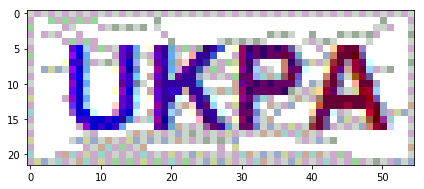

In [4]:
io.imshow(captcha)

In [5]:
from skimage import color

H:\env\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
H:\env\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


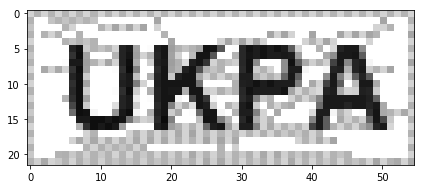

In [14]:
gray = color.rgb2gray(captcha)
io.imshow(gray)

In [15]:
h, w = gray.shape
print(h, w)

22 55


In [17]:
import warnings

warnings.filterwarnings('ignore')

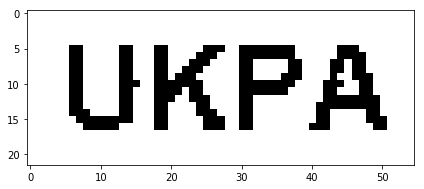

In [18]:
# 去噪
for i in range(h):
    for j in range(w):
        # 根据索引取出像素0~1, 值越小越黑，越大越白
        # 阈值，< t--->0, >--->1
        # 二值化
        if gray[i, j] < 0.5:
            gray[i, j] = 0
        else:
            gray[i, j] = 1
            
io.imshow(gray)
        

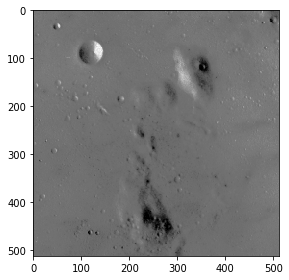

In [19]:
# skimage自带图
moon = data.moon()
io.imshow(moon)

In [22]:
# 效果增强
from skimage import exposure

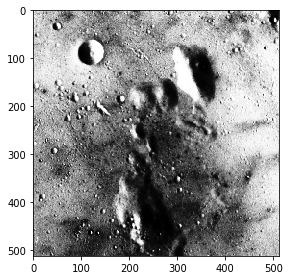

In [23]:
# 使用直方图均衡化图片
moon_hist = exposure.equalize_hist(moon)
io.imshow(moon_hist)

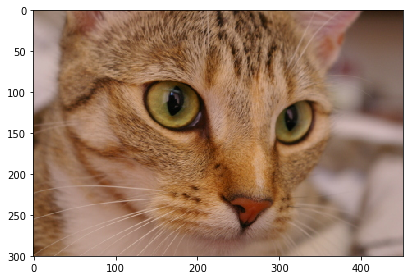

In [24]:
chelsea = data.chelsea()
io.imshow(chelsea)

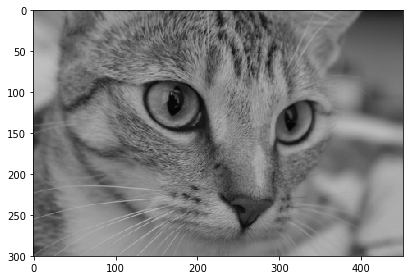

In [26]:
gray = color.rgb2gray(chelsea)
gray
io.imshow(gray)

In [29]:
# 二值化操作，需要阈值，使用算法将阈值计算出来
threshold = filters.threshold_otsu(gray)

In [28]:
gray.shape

(300, 451)

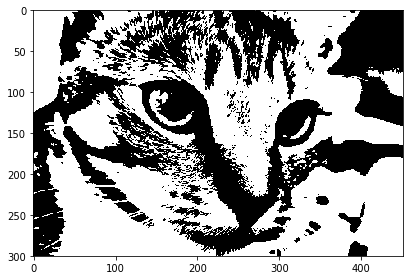

In [31]:
for i in range(300):
    for j in range(451):
        if gray[i, j] < threshold:
            gray[i, j] = 0
        else:
            gray[i, j] = 1
io.imshow(gray)

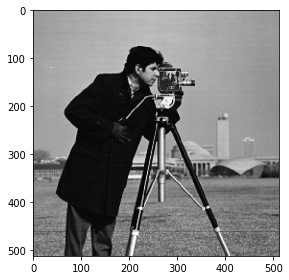

In [33]:
# 图片轮廓找出来
camera = data.camera()
io.imshow(camera)

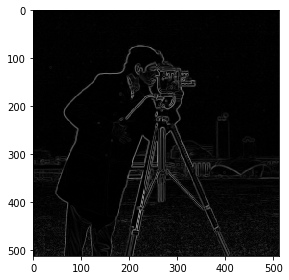

In [35]:
# 过滤，滤波
edges = filters.edges.prewitt(camera)

io.imshow(edges)

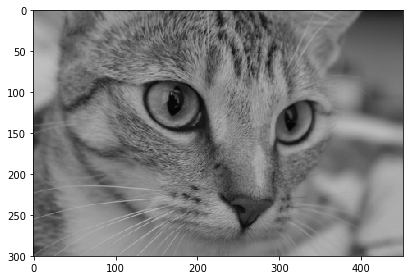

In [36]:
gray = color.rgb2gray(data.chelsea())
io.imshow(gray)

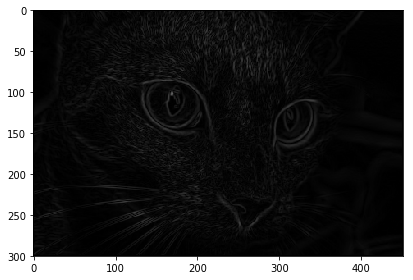

In [39]:
edges = filters.edges.prewitt(gray)
io.imshow(edges)

H:\env\anaconda3\lib\site-packages\skimage\filters\_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


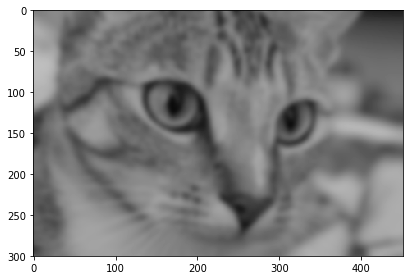

In [40]:
# 高斯分布， 正态分布（std标准差）， sigma高斯核
g = filters.gaussian_filter(gray, sigma=3)
io.imshow(g)

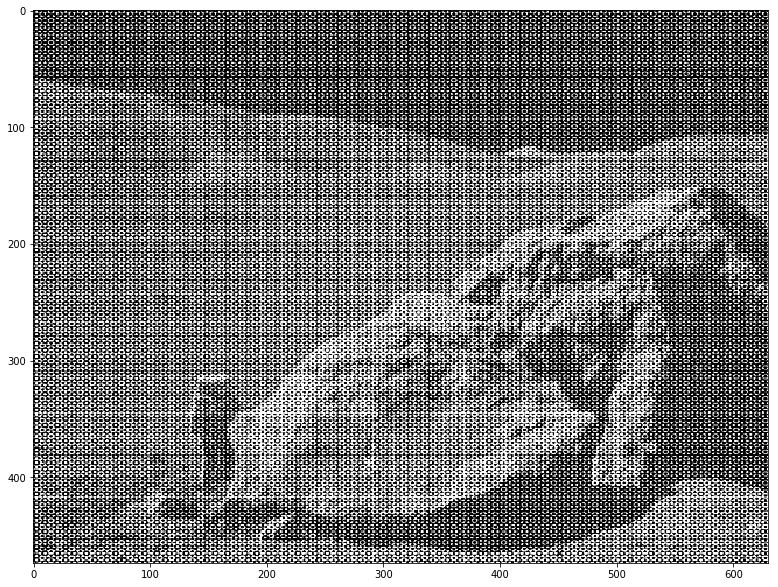

In [44]:
moon = io.imread('./moonlanding.png')
img = io.imshow(moon)

fig = img.get_figure()
fig.set_size_inches(12, 9)

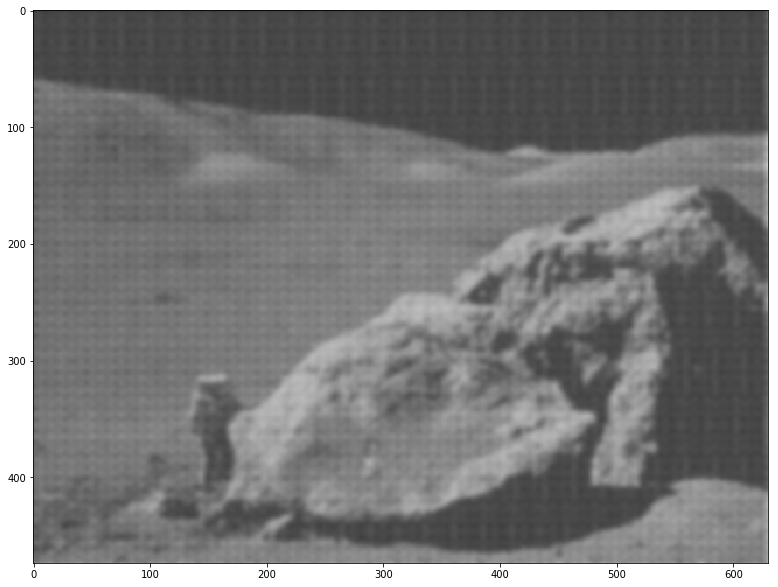

In [47]:
# 图片本来是模糊的，高斯滤波，可以使图片变得清晰
moon2 = filters.gaussian(moon, sigma=2.5)

img = io.imshow(moon2)
fig = img.get_figure()
fig.set_size_inches(12, 9)